<a href="https://colab.research.google.com/github/marcochisci/Anomaly_detection/blob/main/One_Day_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airquino Table Data of 1 day
Getting all the datas of 10th of July

In [1]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query = """select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-07-10 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'') 
and sd.data_acquired <= to_timestamp(''2021-07-11 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'') 
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('PM2.5'::varchar), ('CO2'::varchar), ('Temp. int.'::varchar), ('T'::varchar)
 , ('PM10'::varchar), ('RH'::varchar), ('NO2'::varchar), ('CO'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "O3" float, "PM2.5" float, "CO2" float, "Temp. int." float, "T" float, "PM10" float,
"RH" float, "NO2" float, "CO" float, "VOC" float);""".format(29510692, 23284701)  #23284701 is a specific station

df = pd.read_sql(query, conn)
df= df.set_index('Dates')

#fix Temp. int.
df['Temp. int.'] = df['Temp. int.'].div(100)

#removing nans
df = df.dropna()

display(df)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,
2021-07-10 00:00:00,298.0,1.0,409.0,34.66,219.0,3.0,490.0,221.0,211.0,341.0
2021-07-10 00:01:00,298.0,1.0,410.0,34.65,218.0,6.0,492.0,222.0,211.0,340.0
2021-07-10 00:03:00,298.0,1.0,412.0,34.56,218.0,3.0,495.0,228.0,210.0,342.0
2021-07-10 00:04:00,299.0,1.0,412.0,34.50,217.0,4.0,500.0,226.0,211.0,341.0
2021-07-10 00:06:00,298.0,1.0,410.0,34.55,217.0,3.0,493.0,225.0,211.0,341.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-10 23:54:00,351.0,2.0,404.0,35.54,226.0,7.0,654.0,210.0,237.0,340.0
2021-07-10 23:55:00,350.0,2.0,404.0,35.51,226.0,5.0,654.0,226.0,238.0,344.0
2021-07-10 23:57:00,349.0,2.0,403.0,35.48,226.0,6.0,669.0,224.0,239.0,343.0


Plots

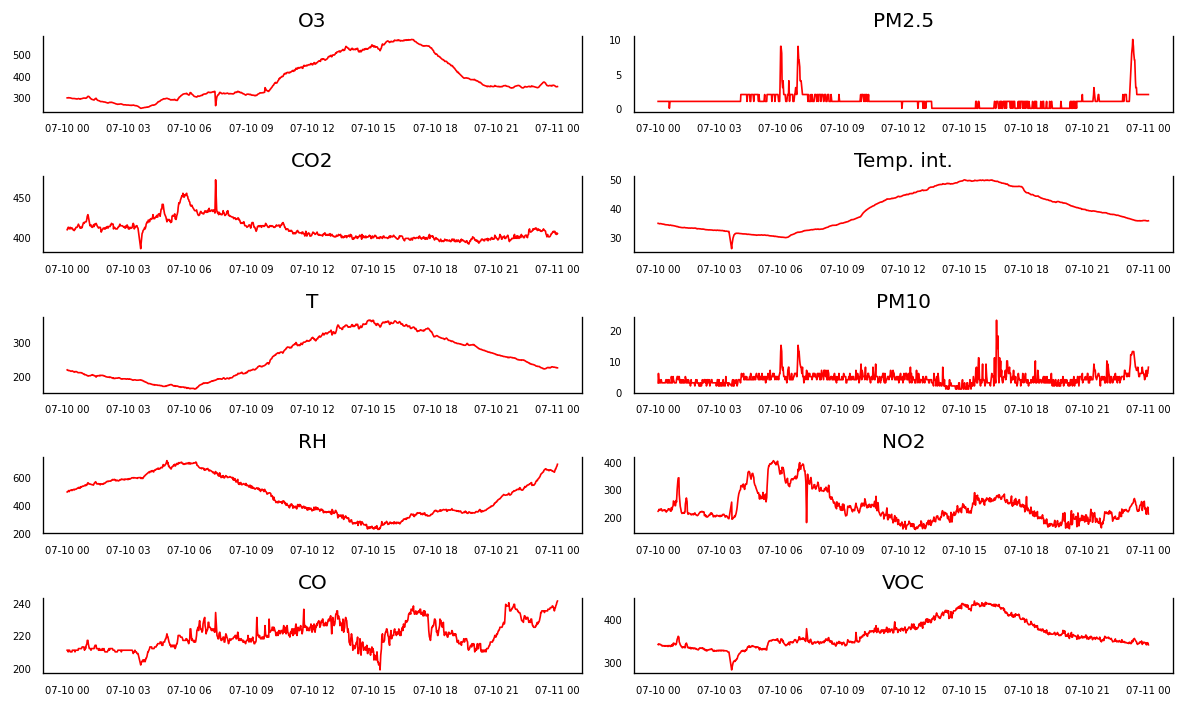

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

You can also use the next cell to get an average of all the values in a choosen timeframe (you can choose it by changing "1 hour" to whatever you want)

,avgO3,avgPM2.5,avgCO2,avgTempInt,avgT,avgPM10,avgRH,avgNO2,avgCO,avgVOC
Dates,,,,,,,,,,
2021-07-10 00:00:00,295.794872,0.974359,413.102564,34.104872,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897
2021-07-10 01:00:00,287.815789,1.000000,413.552632,33.093684,201.868421,3.342105,549.657895,224.368421,211.894737,335.105263
2021-07-10 02:00:00,270.700000,1.000000,413.000000,32.457750,194.675000,3.125000,575.500000,208.900000,211.025000,328.525000
2021-07-10 03:00:00,258.411765,1.000000,410.647059,31.218235,187.823529,2.941176,595.911765,214.029412,208.029412,315.058824
2021-07-10 04:00:00,278.421053,1.763158,426.473684,30.853421,174.447368,4.578947,659.631579,320.631579,214.657895,331.131579
2021-07-10 05:00:00,301.461538,1.589744,438.307692,30.367179,170.384615,4.871795,686.717949,347.487179,216.230769,342.487179
2021-07-10 06:00:00,312.641026,3.358974,432.923077,30.615385,173.282051,7.076923,670.820513,347.461538,223.025641,347.564103
2021-07-10 07:00:00,317.394737,1.736842,431.473684,32.367632,191.526316,5.263158,611.736842,327.289474,220.210526,349.026316
2021-07-10 08:00:00,318.631579,1.263158,418.894737,33.766316,208.000000,4.815789,555.078947,267.894737,217.736842,346.368421


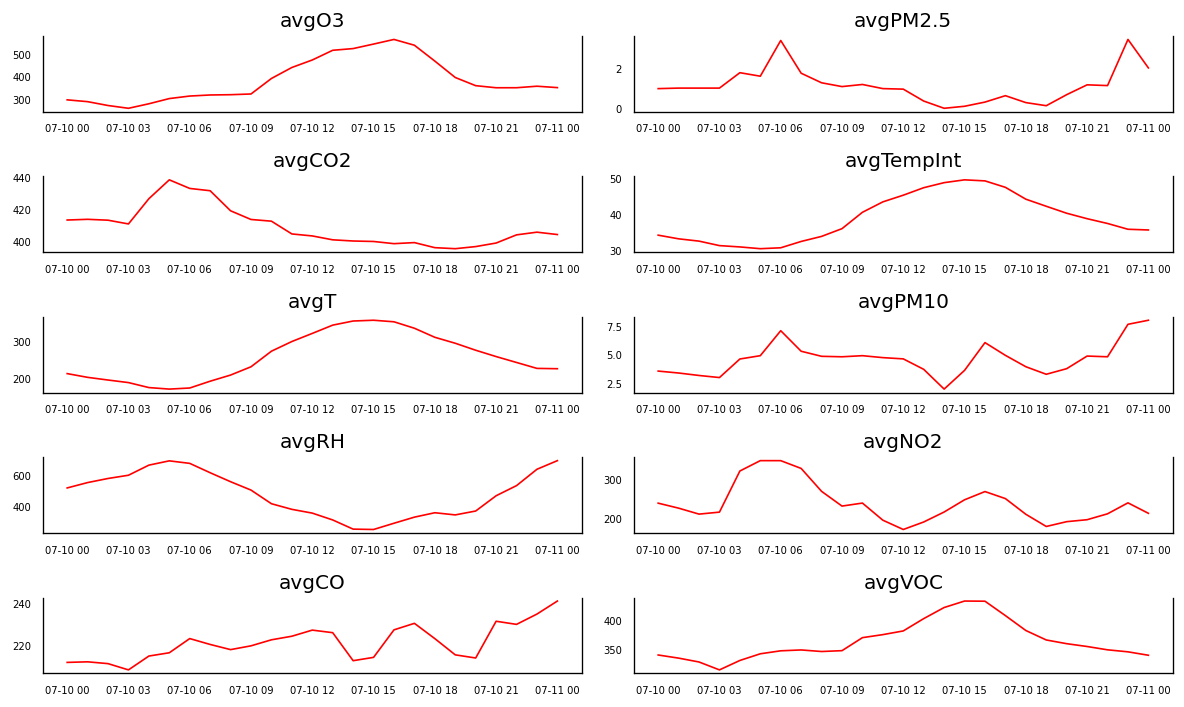

In [3]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select time_bucket('1 hour', c."Dates" ) as "bucket", avg(c."O3") as "avgO3" ,  avg(c."PM2.5") as "avgPM2.5", avg(c."CO2") as "avgCO2",
 avg(c."Temp. int.") as "avgTempInt",  avg(c."T") as "avgT",  avg(c."PM10") as "avgPM10", avg(c."RH") as "avgRH", avg(c."NO2") as 
 "avgNO2", avg(c."CO") as "avgCO", avg(c."VOC") as "avgVOC"
from (select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-07-10 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-07-11 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('PM2.5'::varchar), ('CO2'::varchar), ('Temp. int.'::varchar), ('T'::varchar)
 , ('PM10'::varchar), ('RH'::varchar), ('NO2'::varchar), ('CO'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "O3" float, "PM2.5" float, "CO2" float, "Temp. int." float, "T" float, "PM10" float,
"RH" float, "NO2" float, "CO" float, "VOC" float))  c 
group by bucket
order by bucket asc;
 """

timebucket = pd.read_sql(query, conn)
timebucket= timebucket.rename(columns={'bucket': 'Dates'})
timebucket=timebucket.set_index('Dates')
#fix temp int
timebucket['avgTempInt'] = timebucket['avgTempInt'].div(100)

display(timebucket)

# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = timebucket[timebucket.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(timebucket.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Testing stationarity 

Test first 3 colums: O3, PM2.5, CO2

In [9]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]                   
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

adf_test_results1 = {
    col: test_stationarity(df, col)
    for col in df[df.columns[0:3]].columns
}
adf_test_results1    

{'CO2': 'Stationary', 'O3': 'Stationary', 'PM2.5': 'Stationary'}

Test T, Temp. int. and PM10

In [10]:
adf_test_results2 = {
    col: test_stationarity(df, col)
    for col in df[df.columns[3:6]].columns
}
adf_test_results2   

{'PM10': 'Stationary', 'T': 'Stationary', 'Temp. int.': 'Stationary'}

Test RH, NO2, CO and VOC

In [11]:
adf_test_results3 = {
    col: test_stationarity(df, col)
    for col in df[df.columns[6:10]].columns
}
adf_test_results3   

{'CO': 'Stationary',
 'NO2': 'Stationary',
 'RH': 'Stationary',
 'VOC': 'Stationary'}

Converting to stationary with differencing

In [7]:
#before differencing
df_copy= df.copy()

In [8]:
def differencing(data, column, order):
    differenced_data = data[column].diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data
for col in df.columns:
    df[col] = differencing(df, col, 1)

Test for stationarity now

# VAR model

Finding the best lag for VAR model

In [12]:
from statsmodels.tsa.api import VAR
max_lag = 40
var_model = VAR(df)
# select the best lag order
lag_results = var_model.select_order(max_lag)
selected_lag = lag_results.aic
print(selected_lag)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3


Finding anomalies

In [13]:
import numpy as np

#0 means that is it not an anomaly
def find_anomalies(squared_errors):
    threshold = np.mean(squared_errors) + np.std(squared_errors)
    predictions = (squared_errors >= threshold).astype(int)
    return predictions, threshold
var = VAR(df)
var_fitresults = var.fit(selected_lag)
squared_errors = var_fitresults.resid.sum(axis=1) ** 2
predictions, threshold = find_anomalies(squared_errors)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [14]:
data = df_copy.iloc[selected_lag:, :]
data['Predictions'] = predictions.values
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-07-10 00:04:00,299.0,1.0,412.0,34.50,217.0,4.0,500.0,226.0,211.0,341.0,0
2021-07-10 00:06:00,298.0,1.0,410.0,34.55,217.0,3.0,493.0,225.0,211.0,341.0,0
2021-07-10 00:07:00,298.0,1.0,411.0,34.57,217.0,3.0,498.0,228.0,211.0,341.0,0
2021-07-10 00:09:00,298.0,1.0,412.0,34.52,216.0,4.0,502.0,230.0,210.0,339.0,0
2021-07-10 00:11:00,297.0,1.0,410.0,34.45,215.0,3.0,503.0,225.0,210.0,339.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10 23:54:00,351.0,2.0,404.0,35.54,226.0,7.0,654.0,210.0,237.0,340.0,0
2021-07-10 23:55:00,350.0,2.0,404.0,35.51,226.0,5.0,654.0,226.0,238.0,344.0,0
2021-07-10 23:57:00,349.0,2.0,403.0,35.48,226.0,6.0,669.0,224.0,239.0,343.0,0


In [15]:
data['Predictions'].value_counts()

0    848
1     82
Name: Predictions, dtype: int64

Forecasting the values using the var model

In [16]:
forecast_input = df.values[-selected_lag:]
forecast = var_fitresults.forecast(forecast_input, steps=len(df)-selected_lag)
print(forecast)

[[ 2.70742197e-01  2.01300699e-01 -1.43492631e+00 ...  1.32702325e+00
   1.97145408e-01 -1.68536460e-01]
 [-4.90385544e-01 -5.41584483e-02 -3.81957691e-01 ...  1.46278567e+00
   1.22350306e-01  3.33619013e-02]
 [-3.74718339e-01  1.03986477e-01  2.24595815e-01 ... -1.29529680e+00
   3.39403267e-01  1.39740426e-01]
 ...
 [ 5.41839993e-02  1.32265326e-03 -1.00712078e-02 ... -1.28303358e-02
   3.37900801e-02 -1.16559937e-03]
 [ 5.41839993e-02  1.32265326e-03 -1.00712078e-02 ... -1.28303358e-02
   3.37900801e-02 -1.16559937e-03]
 [ 5.41839993e-02  1.32265326e-03 -1.00712078e-02 ... -1.28303358e-02
   3.37900801e-02 -1.16559937e-03]]


Making it a dataframe

In [17]:
df_forecast = pd.DataFrame(forecast, index=df_copy.index[-(len(df_copy)-selected_lag):], columns=df.columns)


Reverting the differencing

In [18]:
df_train= df_copy[0:-(len(df_copy)-selected_lag)]
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)] = df_train[col].iloc[-1] + df_fc[str(col)].cumsum()
    return df_fc
pred = invert_transformation(df_train, df_forecast, second_diff=False)
display(pred)     


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,
2021-07-10 00:04:00,298.270742,1.201301,410.565074,34.498268,218.041982,1.861059,489.778650,229.327023,210.197145,341.831464
2021-07-10 00:06:00,297.780357,1.147142,410.183116,34.491686,217.648009,2.076235,491.775774,230.789809,210.319496,341.864825
2021-07-10 00:07:00,297.405638,1.251129,410.407712,34.475472,217.781431,2.123043,492.180488,229.494512,210.658899,342.004566
2021-07-10 00:09:00,297.403303,1.220398,410.465230,34.479279,217.857447,2.329812,492.161907,230.615634,210.662157,342.043621
2021-07-10 00:11:00,297.412923,1.219614,410.402258,34.473873,217.865107,2.149035,492.649612,231.204360,210.719698,342.057446
...,...,...,...,...,...,...,...,...,...,...
2021-07-10 23:54:00,347.376868,2.438599,401.150279,35.331266,224.708063,5.547237,680.592734,219.116838,241.809763,340.931261
2021-07-10 23:55:00,347.431052,2.439922,401.140208,35.332198,224.715567,5.550884,680.796789,219.104007,241.843553,340.930095
2021-07-10 23:57:00,347.485236,2.441244,401.130137,35.333129,224.723071,5.554531,681.000844,219.091177,241.877343,340.928930


Creating a data frame with all the informations:
on the left side there are the actual values and on the right side there are the predicted values;
0 means it is not an anomaly and 1 means it is

In [19]:
data.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)
results=pd.concat([data, pred], axis=1)
results['Dates'] = df.index[selected_lag:]
# fix data
data['Dates']=df.index[selected_lag:]
data=data.set_index('Dates')
# fix pred
pred['Dates']=df.index[selected_lag:]
pred=pred.set_index('Dates')
#print results
results=results.set_index('Dates')
results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:04:00,299.0,1.0,412.0,34.50,217.0,4.0,500.0,226.0,211.0,341.0,0,298.270742,1.201301,410.565074,34.498268,218.041982,1.861059,489.778650,229.327023,210.197145,341.831464
2021-07-10 00:06:00,298.0,1.0,410.0,34.55,217.0,3.0,493.0,225.0,211.0,341.0,0,297.780357,1.147142,410.183116,34.491686,217.648009,2.076235,491.775774,230.789809,210.319496,341.864825
2021-07-10 00:07:00,298.0,1.0,411.0,34.57,217.0,3.0,498.0,228.0,211.0,341.0,0,297.405638,1.251129,410.407712,34.475472,217.781431,2.123043,492.180488,229.494512,210.658899,342.004566
2021-07-10 00:09:00,298.0,1.0,412.0,34.52,216.0,4.0,502.0,230.0,210.0,339.0,0,297.403303,1.220398,410.465230,34.479279,217.857447,2.329812,492.161907,230.615634,210.662157,342.043621
2021-07-10 00:11:00,297.0,1.0,410.0,34.45,215.0,3.0,503.0,225.0,210.0,339.0,0,297.412923,1.219614,410.402258,34.473873,217.865107,2.149035,492.649612,231.204360,210.719698,342.057446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10 23:54:00,351.0,2.0,404.0,35.54,226.0,7.0,654.0,210.0,237.0,340.0,0,347.376868,2.438599,401.150279,35.331266,224.708063,5.547237,680.592734,219.116838,241.809763,340.931261
2021-07-10 23:55:00,350.0,2.0,404.0,35.51,226.0,5.0,654.0,226.0,238.0,344.0,0,347.431052,2.439922,401.140208,35.332198,224.715567,5.550884,680.796789,219.104007,241.843553,340.930095
2021-07-10 23:57:00,349.0,2.0,403.0,35.48,226.0,6.0,669.0,224.0,239.0,343.0,0,347.485236,2.441244,401.130137,35.333129,224.723071,5.554531,681.000844,219.091177,241.877343,340.928930


This are the detected anomalies

In [21]:
anomalies = results[(results['Predictions'] == 1)]
anomalies

,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:56:00,297.0,1.0,419.0,33.54,204.0,5.0,538.0,300.0,214.0,353.0,1,299.044741,1.258792,410.133796,34.500064,218.014737,2.293993,498.575822,230.561497,211.669011,341.970975
2021-07-10 00:58:00,299.0,1.0,423.0,33.55,203.0,5.0,540.0,331.0,215.0,357.0,1,299.098925,1.260115,410.123725,34.500996,218.022241,2.297640,498.779877,230.548667,211.702801,341.969810
2021-07-10 00:59:00,302.0,1.0,426.0,33.43,202.0,4.0,549.0,341.0,217.0,360.0,1,299.153109,1.261438,410.113654,34.501928,218.029745,2.301288,498.983932,230.535836,211.736591,341.968644
2021-07-10 01:02:00,305.0,1.0,426.0,33.33,201.0,5.0,549.0,283.0,215.0,347.0,1,299.261477,1.264083,410.093512,34.503791,218.044752,2.308582,499.392041,230.510176,211.804171,341.966313
2021-07-10 01:04:00,304.0,1.0,421.0,33.34,202.0,3.0,550.0,255.0,213.0,343.0,1,299.315661,1.265406,410.083440,34.504723,218.052256,2.312229,499.596096,230.497345,211.837962,341.965148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10 21:10:00,349.0,1.0,400.0,38.95,262.0,4.0,441.0,214.0,224.0,359.0,1,341.633364,2.298398,402.217827,35.232491,223.912668,5.160641,658.962922,220.476853,238.228014,341.054814
2021-07-10 21:16:00,350.0,1.0,397.0,38.93,260.0,4.0,457.0,181.0,225.0,352.0,1,341.850100,2.303688,402.177542,35.236218,223.942683,5.175229,659.779141,220.425532,238.363174,341.050152
2021-07-10 21:39:00,348.0,1.0,394.0,38.49,255.0,2.0,469.0,174.0,237.0,350.0,1,342.554492,2.320883,402.046617,35.248332,224.040231,5.222642,662.431854,220.258737,238.802445,341.034999


Comparing the actual values and the predicted values

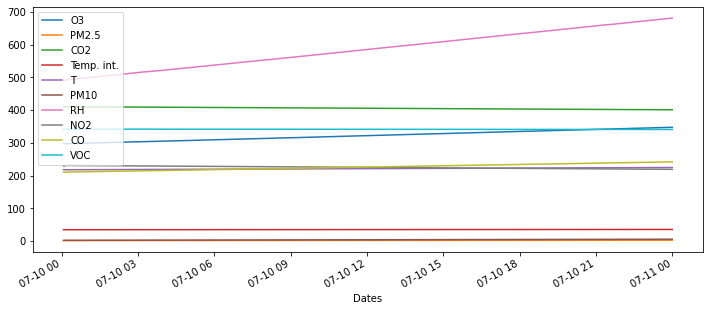

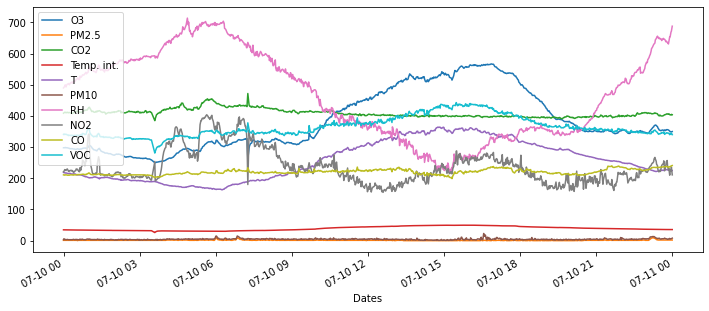

In [23]:
pred.plot(figsize=(12,5),legend=True)
df_copy.plot(figsize=(12,5),legend=True)

Creating a data frame with the actual values and the avg values 

In [24]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select * 
from (select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-07-10 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-07-11 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('PM2.5'::varchar), ('CO2'::varchar), ('Temp. int.'::varchar), ('T'::varchar)
 , ('PM10'::varchar), ('RH'::varchar), ('NO2'::varchar), ('CO'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "O3" float, "PM2.5" float, "CO2" float, "Temp. int." float, "T" float, "PM10" float,
"RH" float, "NO2" float, "CO" float, "VOC" float)) c
join (select time_bucket('1 hour', c."Dates" ) as "bucket", avg(c."O3") as "avgO3" ,  avg(c."PM2.5") as "avgPM2.5", avg(c."CO2") as "avgCO2",
 avg(c."Temp. int.") as "avgTempInt",  avg(c."T") as "avgT",  avg(c."PM10") as "avgPM10", avg(c."RH") as "avgRH", avg(c."NO2") as 
 "avgNO2", avg(c."CO") as "avgCO", avg(c."VOC") as "avgVOC"
from (select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-07-10 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-07-11 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 23284701 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('PM2.5'::varchar), ('CO2'::varchar), ('Temp. int.'::varchar), ('T'::varchar)
 , ('PM10'::varchar), ('RH'::varchar), ('NO2'::varchar), ('CO'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "O3" float, "PM2.5" float, "CO2" float, "Temp. int." float, "T" float, "PM10" float,
"RH" float, "NO2" float, "CO" float, "VOC" float))  c 
group by bucket
order by bucket asc) t
on c."Dates" BETWEEN t.bucket AND t.bucket + interval '1 hour'
 """

average_values = pd.read_sql(query, conn)
average_values=average_values.set_index('Dates')


In [25]:
average_values = average_values.iloc[selected_lag:, :]
average_values['Predictions'] = data['Predictions']
display(average_values)


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,bucket,avgO3,avgPM2.5,avgCO2,avgTempInt,avgT,avgPM10,avgRH,avgNO2,avgCO,avgVOC,Predictions
Dates,,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:04:00,299.0,1.0,412.0,3450.0,217.0,4.0,500.0,226.0,211.0,341.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,3410.487179,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,0
2021-07-10 00:06:00,298.0,1.0,410.0,3455.0,217.0,3.0,493.0,225.0,211.0,341.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,3410.487179,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,0
2021-07-10 00:07:00,298.0,1.0,411.0,3457.0,217.0,3.0,498.0,228.0,211.0,341.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,3410.487179,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,0
2021-07-10 00:09:00,298.0,1.0,412.0,3452.0,216.0,4.0,502.0,230.0,210.0,339.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,3410.487179,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,0
2021-07-10 00:11:00,297.0,1.0,410.0,3445.0,215.0,3.0,503.0,225.0,210.0,339.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,3410.487179,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10 23:55:00,350.0,2.0,404.0,3551.0,226.0,5.0,654.0,226.0,238.0,344.0,2021-07-10 23:00:00,356.230769,3.410256,405.487179,3573.564103,225.871795,7.641026,633.615385,238.102564,234.769231,345.820513,0
2021-07-10 23:57:00,349.0,2.0,403.0,3548.0,226.0,6.0,669.0,224.0,239.0,343.0,2021-07-10 23:00:00,356.230769,3.410256,405.487179,3573.564103,225.871795,7.641026,633.615385,238.102564,234.769231,345.820513,0
2021-07-10 23:58:00,349.0,2.0,405.0,3550.0,225.0,6.0,672.0,236.0,240.0,345.0,2021-07-10 23:00:00,356.230769,3.410256,405.487179,3573.564103,225.871795,7.641026,633.615385,238.102564,234.769231,345.820513,0


These are the anomalies

In [26]:
anomalies_average = average_values[(average_values['Predictions'] == 1)]
anomalies_average

,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,bucket,avgO3,avgPM2.5,avgCO2,avgTempInt,avgT,avgPM10,avgRH,avgNO2,avgCO,avgVOC,Predictions
Dates,,,,,,,,,,,,,,,,,,,,,,
2021-07-10 00:56:00,297.0,1.0,419.0,3354.0,204.0,5.0,538.0,300.0,214.0,353.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,3410.487179,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,1
2021-07-10 00:58:00,299.0,1.0,423.0,3355.0,203.0,5.0,540.0,331.0,215.0,357.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,3410.487179,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,1
2021-07-10 00:59:00,302.0,1.0,426.0,3343.0,202.0,4.0,549.0,341.0,217.0,360.0,2021-07-10 00:00:00,295.794872,0.974359,413.102564,3410.487179,211.897436,3.512821,515.820513,237.282051,211.615385,340.435897,1
2021-07-10 01:02:00,305.0,1.0,426.0,3333.0,201.0,5.0,549.0,283.0,215.0,347.0,2021-07-10 01:00:00,287.815789,1.000000,413.552632,3309.368421,201.868421,3.342105,549.657895,224.368421,211.894737,335.105263,1
2021-07-10 01:04:00,304.0,1.0,421.0,3334.0,202.0,3.0,550.0,255.0,213.0,343.0,2021-07-10 01:00:00,287.815789,1.000000,413.552632,3309.368421,201.868421,3.342105,549.657895,224.368421,211.894737,335.105263,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10 21:10:00,349.0,1.0,400.0,3895.0,262.0,4.0,441.0,214.0,224.0,359.0,2021-07-10 21:00:00,349.405405,1.162162,398.675676,3865.621622,257.567568,4.837838,466.513514,194.405405,231.324324,354.891892,1
2021-07-10 21:16:00,350.0,1.0,397.0,3893.0,260.0,4.0,457.0,181.0,225.0,352.0,2021-07-10 21:00:00,349.405405,1.162162,398.675676,3865.621622,257.567568,4.837838,466.513514,194.405405,231.324324,354.891892,1
2021-07-10 21:39:00,348.0,1.0,394.0,3849.0,255.0,2.0,469.0,174.0,237.0,350.0,2021-07-10 21:00:00,349.405405,1.162162,398.675676,3865.621622,257.567568,4.837838,466.513514,194.405405,231.324324,354.891892,1
